In [5]:
%matplotlib inline

import numpy as np
import scipy
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial
np.random.seed(42)

In [6]:
A = np.random.rand(4,4)
A

array([[0.37454012, 0.95071431, 0.73199394, 0.59865848],
       [0.15601864, 0.15599452, 0.05808361, 0.86617615],
       [0.60111501, 0.70807258, 0.02058449, 0.96990985],
       [0.83244264, 0.21233911, 0.18182497, 0.18340451]])

In [7]:
# LU decomposition in scipy
scipy.linalg.lu(A)

(array([[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.]]),
 array([[1.        , 0.        , 0.        , 0.        ],
        [0.44992904, 1.        , 0.        , 0.        ],
        [0.72210983, 0.64868509, 1.        , 0.        ],
        [0.18742269, 0.13587524, 0.12082855, 1.        ]]),
 array([[ 0.83244264,  0.21233911,  0.18182497,  0.18340451],
        [ 0.        ,  0.85517677,  0.65018561,  0.51613947],
        [ 0.        ,  0.        , -0.53247881,  0.50265968],
        [ 0.        ,  0.        ,  0.        ,  0.70093576]]))

In [17]:
# create a small dataset for X is a single variable and Y is the target
X = np.random.randint(5, size=(5,))
B  = np.random.randint(5, size=(5,))

# Lets say we try to fit a polynomial function with degree 2 xi = [1, xi, xi**2] for each x
coeffs = [1, 1, 1]
poly_obs = Polynomial(coeffs)
poly_obs

Polynomial([1., 1., 1.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [9]:
@np.vectorize(signature='()->(n)')
def create_poly_feats(x):
    return np.array([1, x, x**2])

A = create_poly_feats(X)
A
                    


array([[ 1,  3,  9],
       [ 1,  1,  1],
       [ 1,  4, 16],
       [ 1,  3,  9],
       [ 1,  0,  0]])

In [10]:
# Solving Ax = B, multiplying A.T both sides of the equation

A_T_A = np.dot(A.T, A)
A_T_B = np.dot(A.T, B)

P, L, U = scipy.linalg.lu(A_T_A)

A_T_B = np.dot(P, A_T_B)


In [11]:
#Implement forward and backward subs to get the coefficients of X
# Ly = A_T_B
y = np.zeros_like(A_T_B)
y[0] = A_T_B[0] / L[0,0]
for i in range(1, y.shape[0]):
    y[i] = (A_T_B[i] - (np.dot(L[i, :i], y[:i]))) / L[i, i]

y

array([ 13.        ,  41.14285714, -12.54285714])

In [16]:
# Backward substitution to get the polynomial coefficients
# Ux = y
coeff = np.zeros_like(y)
coeff[y.shape[0] - 1] = y[y.shape[0] - 1] / U[y.shape[0] - 1, y.shape[0] - 1]

for i in range(y.shape[0]-2, -1 , -1):
    coeff[i] = (y[i] - np.dot(U[i, :], coeff)) / U[i, i]
coeff



array([ 33.35416667, -25.80208333,   4.57291667])

In [35]:
# We need to create more X samples to produced the results using the coefficients

poly_func = np.poly1d(coeff)
x_add_pts = np.linspace(min(X), max(X))
y_outs = poly_func(x_add_pts)

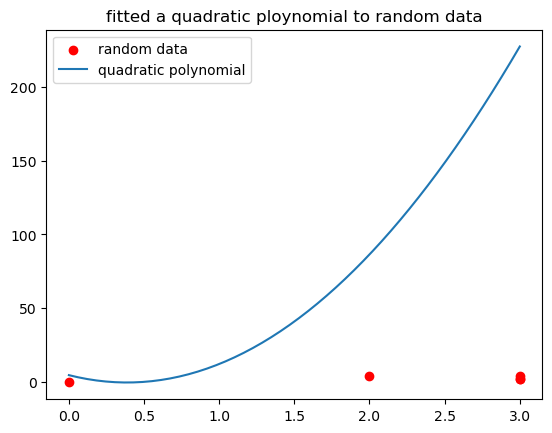

In [42]:
# Plotting the polynomial fitting the data
fig, ax = plt.subplots()
ax.scatter(X, B, color='red', label="random data")
ax.plot(x_add_pts, y_outs, label="quadratic polynomial")
plt.title("fitted a quadratic ploynomial to random data")
plt.legend()